# Zarr file pre-computed spectrograms

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ooi_2025_summer_school_acoustics as oa
import hvplot.xarray
from dask.distributed import Client

In [4]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 24,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42333,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:33465,Total threads: 4
Dashboard: http://127.0.0.1:34837/status,Memory: 10.67 GiB
Nanny: tcp://127.0.0.1:37087,


In [2]:
specs = oa.open_lfspectrograms()

In [5]:
mean_psd = specs.mean('time')

In [7]:
mean_psd = mean_psd.compute()

In [ ]:
mean_psd['AXEC2'].plot()

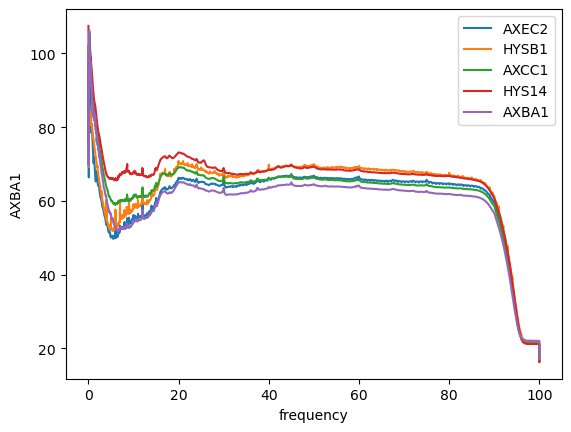

In [14]:
for node in mean_psd:
    mean_psd[node].plot(label=node)

plt.legend()

In [17]:
specs_20Hz = specs.sel({'frequency':slice(15,25)}).mean('frequency')

In [24]:
specs_smooth = specs_20Hz.rolling(time=100, min_periods=1).mean('time')

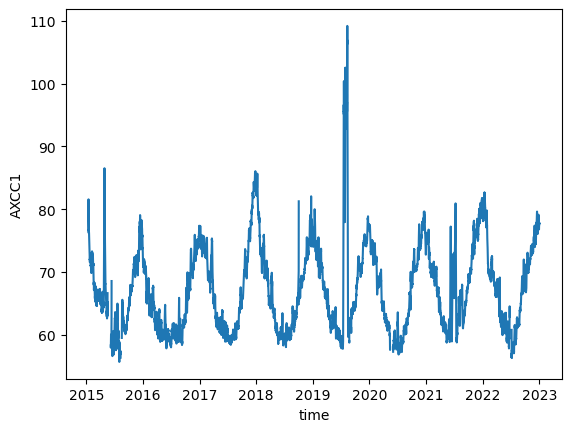

In [25]:
specs_smooth['AXCC1'].plot()